In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your clustered DataFrame (adjust path as needed)
# If you already have df_clustered in memory, skip this cell
data_path = '../../data/input/full-featured.csv'
df = pd.read_csv(data_path)

# Re-run clustering if needed (same as before)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = [
    'daily_return', 'volume', 'log_return', 'price_range',
    'ma_5', 'ma_20', 'volatility_5', 'volatility_20',
    'rsi_14', 'macd_12_26', 'macd_signal_12_26', 'macd_histogram_12_26',
    'stoch_14', 'stoch_smoothk', 'stoch_smoothd','trend_code'
]
X = df[features].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3  # Use the number of clusters you chose previously
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = clusters

In [17]:
cluster_stats = df_clustered.groupby('cluster').agg(
    avg_daily_return=('daily_return', 'mean'),
    avg_price_range=('price_range', 'mean'),
    volatility=('daily_return', 'std'),
    num_days=('daily_return', 'count')
)
print(cluster_stats)

         avg_daily_return  avg_price_range  volatility  num_days
cluster                                                         
0                0.002428       129.158077    0.006892      1560
1               -0.004682       259.509800    0.016012       551
2                0.000421       102.802996    0.008765       918


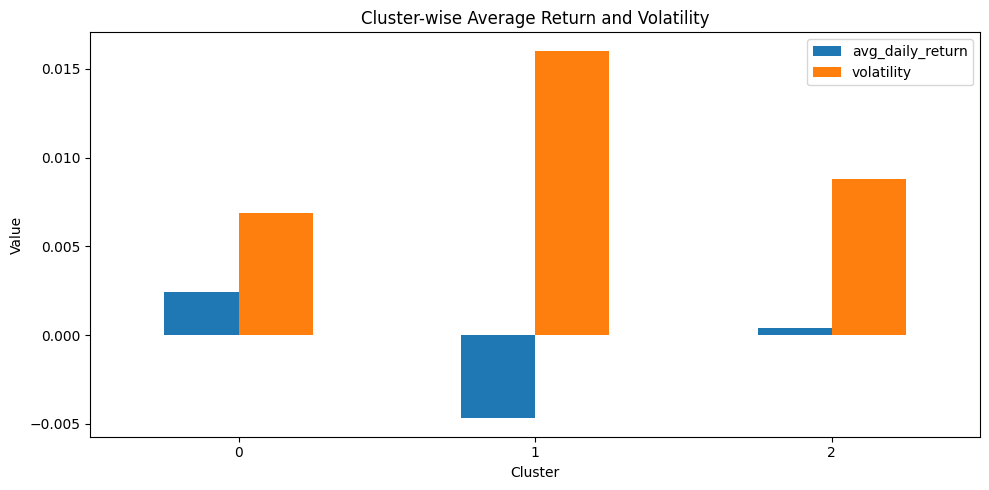

In [18]:
cluster_stats[['avg_daily_return', 'volatility']].plot(kind='bar', figsize=(10, 5))
plt.title('Cluster-wise Average Return and Volatility')
plt.ylabel('Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

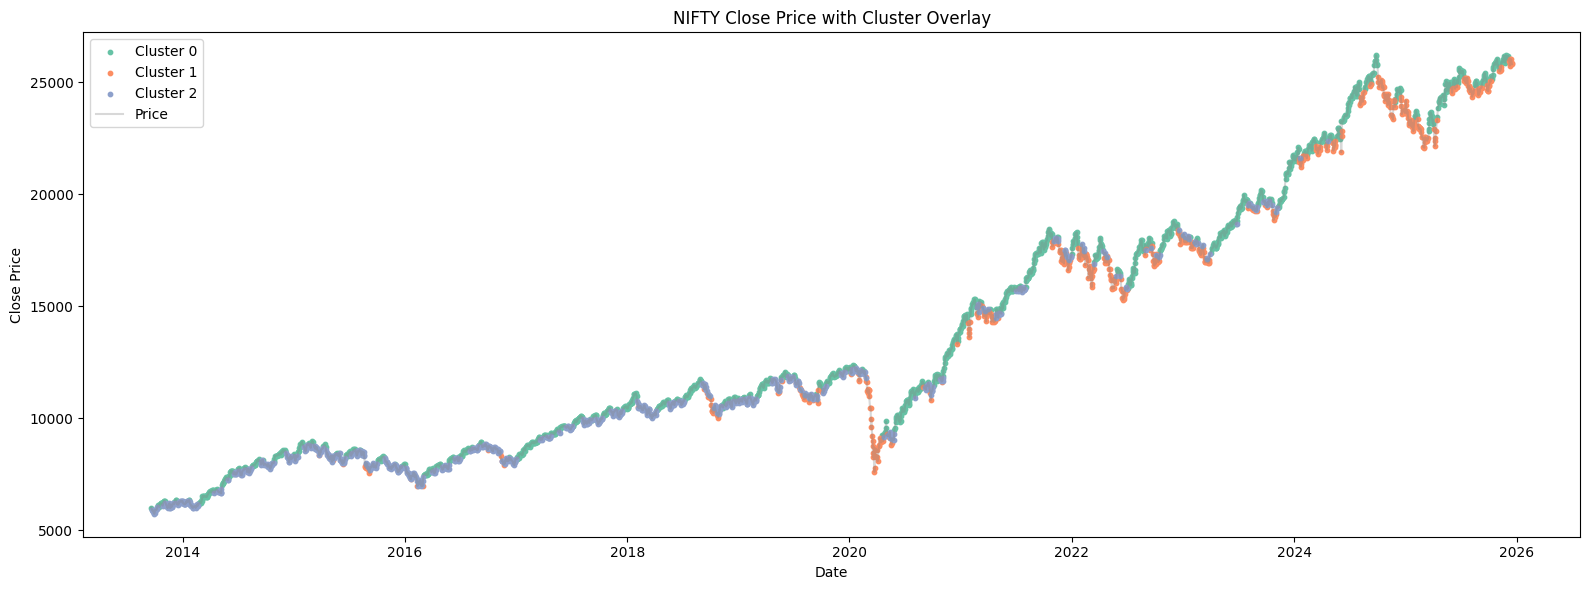

In [19]:
import matplotlib.dates as mdates

# Convert 'date' column to datetime if not already
df_clustered['date'] = pd.to_datetime(df_clustered['date'])

plt.figure(figsize=(16, 6))
palette = sns.color_palette('Set2', n_colors=df_clustered['cluster'].nunique())

for cluster in sorted(df_clustered['cluster'].unique()):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster]
    plt.scatter(
        cluster_data['date'],
        cluster_data['Close'],
        label=f'Cluster {cluster}',
        s=10,
        color=palette[cluster]
    )

plt.plot(df_clustered['date'], df_clustered['Close'], color='gray', alpha=0.3, label='Price')
plt.title('NIFTY Close Price with Cluster Overlay')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

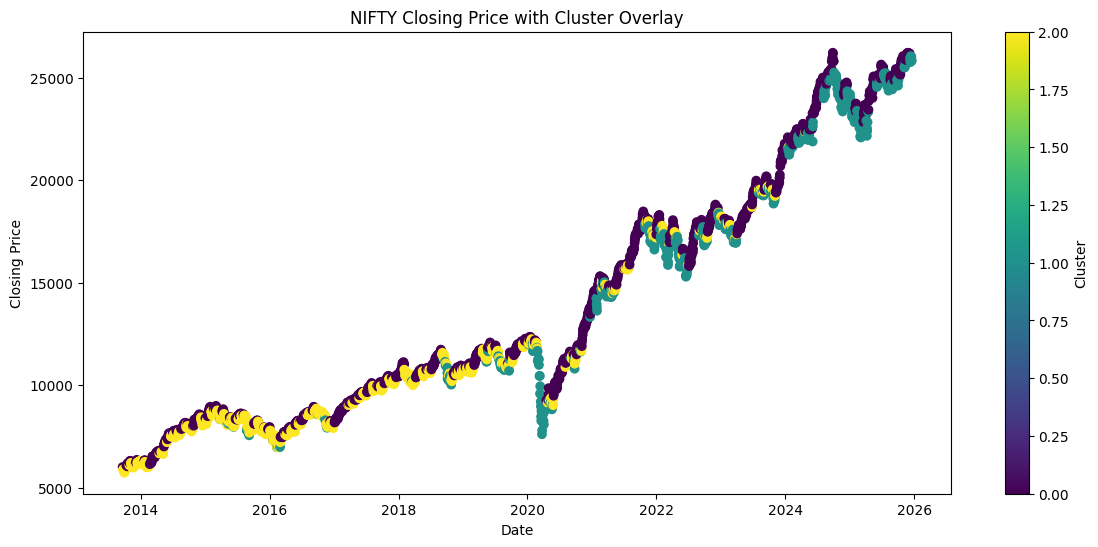

In [20]:
import matplotlib.pyplot as plt

# Ensure 'date' is datetime for proper plotting
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 6))
scatter = plt.scatter(df_clustered['date'], df_clustered['Close'], c=df_clustered['cluster'], cmap='viridis', label=df_clustered['cluster'])
plt.title('NIFTY Closing Price with Cluster Overlay')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [21]:
print(df_clustered['cluster'].unique())
print("Number of clusters:", df_clustered['cluster'].nunique())

# Group by cluster and calculate stats
cluster_stats = df_clustered.groupby('cluster')['daily_return'].agg(['mean', 'std', 'count'])
cluster_stats.rename(columns={'mean': 'avg_return', 'std': 'volatility', 'count': 'num_days'}, inplace=True)
print(cluster_stats)


[0 2 1]
Number of clusters: 3
         avg_return  volatility  num_days
cluster                                  
0          0.002428    0.006892      1560
1         -0.004682    0.016012       551
2          0.000421    0.008765       918


In [22]:
cluster_description = {
    0: "Uptrend/Profitable",
    1: "Downtrend/High Volatility",
    2: "Sideways/Low Volatility"
}

In [23]:
df_clustered['cluster_description'] = df_clustered['cluster'].map(cluster_description)
# Show a sample of the table
# For a specific date, e.g., 20 Jul 2024
specific_date = '2021-07-20'
row = df_clustered[df_clustered['date'] == specific_date][['date', 'cluster', 'cluster_description', 'daily_return']]
print(row)

import pandas as pd
from IPython.display import display

display(df_clustered.head(20))  # Show first 20 rows
df_clustered.to_csv('clustered_dates_with_description.csv', index=False)

                          date  cluster      cluster_description  daily_return
1967 2021-07-20 00:00:00+05:30        2  Sideways/Low Volatility     -0.007637


,date,Open,High,Low,Close,volume,turnover,daily_return,log_return,price_range,...,dow_trend_spec_raw,dow_trend_spec,range,avg_range,is_mother_candle,mother_candle_trend,final_trend,trend_code,cluster,cluster_description
33,2013-09-20 00:00:00+05:30,6104.55,6130.95,5932.85,6012.10,318645265,11587.18,-0.016916,-0.017061,198.10,...,Downtrend,Downtrend,198.10,124.5700,True,Sideways,Downtrend,0,0,Uptrend/Profitable
34,2013-09-23 00:00:00+05:30,5945.80,5989.40,5871.40,5889.75,188322506,6596.17,-0.020351,-0.020561,118.00,...,Downtrend,Downtrend,118.00,125.4200,False,Downtrend,Downtrend,0,2,Sideways/Low Volatility
35,2013-09-24 00:00:00+05:30,5855.00,5938.40,5854.55,5892.45,187578148,7002.84,0.000458,0.000458,83.85,...,Sideways,Downtrend,83.85,125.9000,False,Downtrend,Downtrend,0,2,Sideways/Low Volatility
36,2013-09-25 00:00:00+05:30,5901.55,5910.55,5811.10,5873.85,200162195,6988.96,-0.003157,-0.003162,99.45,...,Downtrend,Downtrend,99.45,123.2150,False,Downtrend,Downtrend,0,2,Sideways/Low Volatility
37,2013-09-26 00:00:00+05:30,5872.80,5917.65,5864.10,5882.25,220589737,7761.99,0.001430,0.001429,53.55,...,Uptrend,Uptrend,53.55,115.9500,False,Downtrend,Uptrend,2,2,Sideways/Low Volatility
38,2013-09-27 00:00:00+05:30,5905.55,5909.20,5819.30,5833.20,163067913,5303.31,-0.008339,-0.008374,89.90,...,Downtrend,Downtrend,89.90,114.1500,False,Downtrend,Downtrend,0,2,Sideways/Low Volatility
39,2013-09-30 00:00:00+05:30,5801.05,5810.20,5718.50,5735.30,155674706,5642.77,-0.016783,-0.016926,91.70,...,Downtrend,Downtrend,91.70,112.0800,False,Downtrend,Downtrend,0,2,Sideways/Low Volatility
40,2013-10-01 00:00:00+05:30,5756.10,5786.45,5700.95,5780.05,159247089,5075.70,0.007803,0.007772,85.50,...,Sideways,Downtrend,85.50,112.0525,False,Downtrend,Downtrend,0,2,Sideways/Low Volatility
41,2013-10-03 00:00:00+05:30,5819.10,5917.60,5802.70,5909.70,199793235,7481.97,0.022431,0.022183,114.90,...,Uptrend,Uptrend,114.90,104.9375,False,Downtrend,Uptrend,2,2,Sideways/Low Volatility
42,2013-10-04 00:00:00+05:30,5891.30,5950.45,5885.00,5907.30,191469248,6052.47,-0.000406,-0.000406,65.45,...,Sideways,Uptrend,65.45,101.1425,False,Downtrend,Downtrend,0,2,Sideways/Low Volatility


In [24]:
# Ensure the data is sorted by date
df_clustered = df_clustered.sort_values('date').reset_index(drop=True)

# Identify where the cluster changes
df_clustered['cluster_change'] = (df_clustered['cluster'] != df_clustered['cluster'].shift()).cumsum()

# Now, each unique value in 'cluster_change' is a run of consecutive days with the same cluster
# Group by consecutive runs
run_stats = df_clustered.groupby('cluster_change').agg(
    start_date=('date', 'first'),
    end_date=('date', 'last'),
    cluster=('cluster', 'first'),
    num_days=('date', 'count'),
    avg_daily_return=('daily_return', 'mean'),
    avg_price_range=('price_range', 'mean'),
    volatility=('daily_return', 'std')
).reset_index(drop=True)

# Make sure long_runs is a copy
long_runs = run_stats.copy()

# Bin avg_daily_return into 3 quantiles
long_runs['return_group'] = pd.qcut(long_runs['avg_daily_return'], 3, labels=['Low Return', 'Medium Return', 'High Return'])

# Bin volatility into 3 quantiles
long_runs['vol_group'] = pd.qcut(long_runs['volatility'], 3, labels=['Low Volatility', 'Medium Volatility', 'High Volatility'])

def define_regime(row):
    if row['return_group'] == 'Low Return' and row['vol_group'] == 'Low Volatility':
        return 'Sideways/Calm'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'Low Volatility':
        return 'Steady Uptrend'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Uptrend'
    elif row['return_group'] == 'Low Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Down/Sideways'
    elif row['return_group'] == 'Medium Return' and row['vol_group'] == 'Medium Volatility':
        return 'Neutral'
    # Add more rules as you see fit
    else:
        return f"{row['return_group']} / {row['vol_group']}"

long_runs['regime'] = long_runs.apply(define_regime, axis=1)

print(long_runs[['start_date', 'end_date', 'cluster', 'num_days', 'avg_daily_return', 'volatility', 'return_group', 'vol_group', 'regime']])

                   start_date                  end_date  cluster  num_days  \
0   2013-09-20 00:00:00+05:30 2013-09-20 00:00:00+05:30        0         1   
1   2013-09-23 00:00:00+05:30 2013-10-10 00:00:00+05:30        2        13   
2   2013-10-11 00:00:00+05:30 2013-10-25 00:00:00+05:30        0        10   
3   2013-10-28 00:00:00+05:30 2013-10-28 00:00:00+05:30        2         1   
4   2013-10-29 00:00:00+05:30 2013-11-05 00:00:00+05:30        0         6   
..                        ...                       ...      ...       ...   
439 2025-10-08 00:00:00+05:30 2025-10-08 00:00:00+05:30        1         1   
440 2025-10-09 00:00:00+05:30 2025-11-04 00:00:00+05:30        0        18   
441 2025-11-06 00:00:00+05:30 2025-11-11 00:00:00+05:30        1         4   
442 2025-11-12 00:00:00+05:30 2025-12-05 00:00:00+05:30        0        18   
443 2025-12-08 00:00:00+05:30 2025-12-17 00:00:00+05:30        1         8   

     avg_daily_return  volatility   return_group        vol_gro

In [25]:
# Ensure the data is sorted by date
df_clustered = df_clustered.sort_values('date').reset_index(drop=True)

# Identify where the cluster changes
df_clustered['cluster_change'] = (df_clustered['cluster'] != df_clustered['cluster'].shift()).cumsum()

# Now, each unique value in 'cluster_change' is a run of consecutive days with the same cluster
# Group by consecutive runs
run_stats = df_clustered.groupby('cluster_change').agg(
    start_date=('date', 'first'),
    end_date=('date', 'last'),
    cluster=('cluster', 'first'),
    num_days=('date', 'count'),
    avg_daily_return=('daily_return', 'mean'),
    avg_price_range=('price_range', 'mean'),
    volatility=('daily_return', 'std')
).reset_index(drop=True)

# Make sure long_runs is a copy
long_runs = long_runs.copy()

# Bin avg_daily_return into 3 quantiles
long_runs['return_group'] = pd.qcut(long_runs['avg_daily_return'], 3, labels=['Low Return', 'Medium Return', 'High Return'])

# Bin volatility into 3 quantiles
long_runs['vol_group'] = pd.qcut(long_runs['volatility'], 3, labels=['Low Volatility', 'Medium Volatility', 'High Volatility'])

def define_regime(row):
    if row['return_group'] == 'Low Return' and row['vol_group'] == 'Low Volatility':
        return 'Sideways/Calm'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'Low Volatility':
        return 'Steady Uptrend'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Uptrend'
    elif row['return_group'] == 'Low Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Down/Sideways'
    elif row['return_group'] == 'Medium Return' and row['vol_group'] == 'Medium Volatility':
        return 'Neutral'
    # Add more rules as you see fit
    else:
        return f"{row['return_group']} / {row['vol_group']}"

long_runs['regime'] = long_runs.apply(define_regime, axis=1)

print(long_runs[['start_date', 'end_date', 'cluster', 'num_days', 'avg_daily_return', 'volatility', 'return_group', 'vol_group', 'regime']])

                   start_date                  end_date  cluster  num_days  \
0   2013-09-20 00:00:00+05:30 2013-09-20 00:00:00+05:30        0         1   
1   2013-09-23 00:00:00+05:30 2013-10-10 00:00:00+05:30        2        13   
2   2013-10-11 00:00:00+05:30 2013-10-25 00:00:00+05:30        0        10   
3   2013-10-28 00:00:00+05:30 2013-10-28 00:00:00+05:30        2         1   
4   2013-10-29 00:00:00+05:30 2013-11-05 00:00:00+05:30        0         6   
..                        ...                       ...      ...       ...   
439 2025-10-08 00:00:00+05:30 2025-10-08 00:00:00+05:30        1         1   
440 2025-10-09 00:00:00+05:30 2025-11-04 00:00:00+05:30        0        18   
441 2025-11-06 00:00:00+05:30 2025-11-11 00:00:00+05:30        1         4   
442 2025-11-12 00:00:00+05:30 2025-12-05 00:00:00+05:30        0        18   
443 2025-12-08 00:00:00+05:30 2025-12-17 00:00:00+05:30        1         8   

     avg_daily_return  volatility   return_group        vol_gro